## Телеком
Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг
Оператор предоставляет два основных типа услуг:
1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Необходимо подготовить модель предсказывающую желание пользователя прекратить использование услуг компании

In [1]:
FOLDER_PATH = ("C:\\Users\\nicku\\OneDrive\\Documents\\Data_Scinence\\Yandex Practicum" +
                "\\Дипломные проект. Телеком\\final_provider")

In [46]:
import pandas as pd
import sklearn
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import sys
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [4]:
#прочитаем все входные данные 
contract_df = pd.read_csv(FOLDER_PATH+'\\contract.csv')
internet_df = pd.read_csv(FOLDER_PATH+'\\internet.csv')
phone_df = pd.read_csv(FOLDER_PATH+'\\phone.csv')
personal_df = pd.read_csv(FOLDER_PATH+'\\personal.csv')

contract_df = pd.read_csv('/datasets/final_provider/contract.csv')
internet_df = pd.read_csv('/datasets/final_provider/internet.csv')
personal_df = pd.read_csv('/datasets/final_provider/personal.csv')
phone_df = pd.read_csv('/datasets/final_provider/phone.csv')

### Данные прочитаны, выполним первичный анализ данных и на их основе составим план выполнения работы.

In [5]:
contract_df.info()
contract_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [6]:
internet_df.info()
internet_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [7]:
phone_df.info()
phone_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [8]:
personal_df.info()
personal_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


<div class="alert alert-info">
<h1>План по выполнению проекта:</h1>
    
* Подготовить данные.
    * Объединить имеющиеся таблицы в единый датасет
    * Обработать пропуски в данных
    * Выделить фичи, которые будут использованы для работы модели, при необходимости создать новые (например: срок жизни клиента)
    * разделить датасет на тренировочную/тестовую выборку
* Исследовать баланс классов, при необходимости выполнить обработку данных, чтоб снизить дизбаланс.
* Обучить несколько моделей учитывая дисбаланс классов. Провести кросс-валидацию и найти лучшую.
* Проверить качество работы модели на тестовых данных. Описать выводы
</div>

### 1. Предобработка данных

#### 1.1. Объединим имеющиеся таблицы в единый датасет

Объединение выполним "левым внешним" соединением так как по некоторым пользователям отсутсвуют данные по использованию интернета и/или телефонии

In [9]:
df = contract_df.merge(internet_df, how='left', on='customerID').merge(
    phone_df, how='left', on='customerID').merge(personal_df, how='left', on='customerID')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  MultipleLines     6361 non-null   object 
 16  gender            7043 non-null   object 


#### 1.2. Обработка пропусков
Как мы и ожидали, в полученной итоговой таблице имеются пропуски в данных по использованию интернета и/или телефонии. 

Отсутсвие данных в датасете означает, что клиент не пользовался данной услугой. Все столбцы с пропусками, кроме "InternetService" содержат булевое значение Yes/No. Поэтому пропуски заполним следующим образом: 
- колонку "InternetService" заполним значением "missing_info" 
- Все остальные пропуски Заполним значением "No" 

In [10]:
df['InternetService'].fillna('missing_info', inplace=True)
df.fillna('No', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  MultipleLines     7043 non-null   object 
 16  gender            7043 non-null   object 


#### 1.3. Приведение типов данных

Для дальнейшего обучения модели, все категориальные значения нужно привести к численному виду. 
Будем использовать два подхода 
- Label Encoding: для преобразования булевых значений к виду 0/1
- One Hot Encoding: для генерации признаков соответствующих уникальным значениям соответствующих столбцов

In [11]:
def encode_column(data_frame, column):
    #убедимся что уникальных значений в столбце 2, а значит они могут быть приведены к виду 0 / 1  
    if len(data_frame[column].unique()) != 2:
        print(f'Значения колонки {column} не могут быть преобразованы методом Label Encoder, т.к. уникальных значений больше 2')
        return data_frame[column]
    else:
        label_encoder = preprocessing.LabelEncoder()
        print(f'Значения столбца {column} преобразованы')  
        return label_encoder.fit_transform(data_frame[column])

In [12]:
# созданим список всех столбцов, значения которых мы хотим преобразовать методом Label Encoding
LE_to_encode = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                     'MultipleLines', 'Partner', 'Dependents', 'PaperlessBilling', 'gender']
for column in LE_to_encode:
    df[column] = encode_column(df, column)

Значения столбца OnlineSecurity преобразованы
Значения столбца OnlineBackup преобразованы
Значения столбца DeviceProtection преобразованы
Значения столбца TechSupport преобразованы
Значения столбца StreamingTV преобразованы
Значения столбца StreamingMovies преобразованы
Значения столбца MultipleLines преобразованы
Значения столбца Partner преобразованы
Значения столбца Dependents преобразованы
Значения столбца PaperlessBilling преобразованы
Значения столбца gender преобразованы


In [13]:
# созданим список всех столбцов, значения которых мы хотим преобразовать методом One Hot Encoding
OHE_to_encode =['Type', 'PaymentMethod', 'InternetService']

#создадим дамми-столбцы для соответствующих признаков 
for column in OHE_to_encode:
    dummy_df = pd.get_dummies(df[column], drop_first=True)
    dummy_df.columns = column+'_'+dummy_df.columns.str.replace(' ', '_')
    # полученные столбцы присоединим к имеющемуся набору данных
    df = pd.concat([df, dummy_df], axis=1)
    
# удалим лишние столбцы из полученного набора данных
df.drop(OHE_to_encode, axis=1, inplace=True)

In [14]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: np.nan if x == ' ' else x)
df['TotalCharges'].dropna(inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], downcast="float")

#### 1.4. Создание целевого признака

In [15]:
#для всех записей с проставленной датой окончания контракта установим значение целевого признака равным 1, для остальных 0
df['leaving'] = df['EndDate'].apply(lambda x: 0 if x == 'No' else 1)

#### 1.5. Создание дополнительных признаков

Добавим дополнительный признак "Срок жизни" клиента, для дальнейшего использования при обучении модели.
Так как целевой признак уже создан, для всех активных записей срок окончания проставим равным дате выгрузки данных: 1 Февраля 2020 года

После чего посчитаем разницу в днях между началом использования услуг и окончанием


In [16]:
df['EndDate'] = df['EndDate'].apply(lambda x: '2020-02-01' if x == 'No' else x)
df['LifeSpan'] = (pd.to_datetime(df['EndDate']) - pd.to_datetime(df['BeginDate'])) / np.timedelta64(1, 'D')

#### 1.6. Разделим датасет на признаки и  таргет

In [17]:
target = df['leaving']
features = df.drop(['leaving'], axis=1)

#### 1.7. Удалим признаки, которые не будут использоваться для обучения модели

In [18]:
features.drop(['customerID', 'BeginDate', 'EndDate'], axis=1, inplace=True)

Проверим нет ли в полученном датасете линейной зависимых признаков, которые будут отрицательно влиять на работу модель. Посмотрим матрицу корреляции пирсона. При необходимости удалим лийнено зависимые признаки

Text(0.5, 1.0, 'Корреляция признаков')

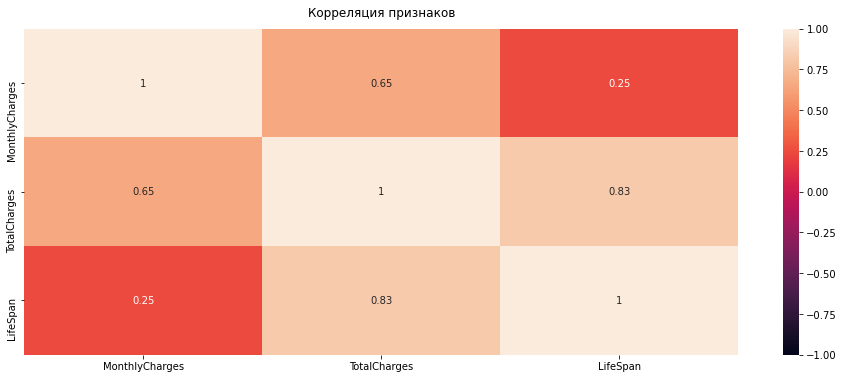

In [19]:
numeric_columns=['MonthlyCharges', 'TotalCharges', 'LifeSpan']
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(features[numeric_columns].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Корреляция признаков', fontdict={'fontsize':12}, pad=12)

По полученной тепловой карте видим что сильная линейная завимисоть между признаками "Срок жизни" и "Итоговые затраты", что весьма предсказуемо: чем больше клиент пользуется услугами компании - тем больше итоговые затраты. Для обучения модели будем использовать только "Срок жизни"

In [20]:
features.drop('TotalCharges', axis=1, inplace=True)

#### 1.8. Разделим выборки на обучающию и тестовую

In [21]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, 
                                                                            random_state=12345)

### 2. Борьба с дисбалансом 

In [22]:
target.value_counts()

0    5174
1    1869
Name: leaving, dtype: int64

В распределении целевого признака явно заметен дисбаланс, что отрицательно скажется на работе модели. Выполним обработку датасета, чтоб снизить дисбаланс целевого признака

#### 2.1. Уменьшение выборки 

Уменьшим количество записей обучающей выборки с значением целевого признака равным 0

In [23]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat(
    [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    
    target_downsampled = pd.concat(
    [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
    features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

In [24]:
features_train_down, target_train_down = downsample(features_train, target_train, 0.75)

#### 2.2. Увеличение выборки 

Увеличим количество записей обучающей выборки с значением целевого признака равным 1

In [25]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [26]:
features_train_final, target_train_final = upsample(features_train_down, target_train_down, 2)

In [27]:
#исходное
target_train.value_counts()

0    4144
1    1490
Name: leaving, dtype: int64

In [28]:
#после даунсемплинга нулей, коилчество единиц без изменений
target_train_down.value_counts()

0    3108
1    1490
Name: leaving, dtype: int64

Проверим итоговое распределение целевого признака после обработки.

In [29]:
target_train_final.value_counts()

0    3108
1    2980
Name: leaving, dtype: int64

#### Вывод: дисбаланс побежден! можно приступить к обучению моделей

### 3. Обучение моделей и подбор гимерпараметров 

Использовать будем несколько вариантов моделей бустинга:
- Light GBM
- Catboost

#### 3.1. Light GBM

In [30]:
%%time
#будем использовать деревья максимальной глубины 3, чтобы исбежать переобучения
depth = 3
roc_auc = []
estimators = []
learn_rate=[]

for estimator in range(100,300,10):
    for lr in np.logspace(-1.0, 0.0, num=5):
        model = LGBMClassifier(random_state=12345, n_estimators=estimator, max_depth=depth, learning_rate=lr)
        roc_auc_mean = pd.Series(cross_val_score(model, features_train_final, target_train_final, cv=5, 
                                             scoring='roc_auc')).mean() 
        roc_auc.append(roc_auc_mean)
        estimators.append(estimator)
        learn_rate.append(lr)
d = {'learning_rate': learn_rate, 'estimators': estimators,'roc_auc': roc_auc}
grad_boosting = pd.DataFrame(data=d) 

Wall time: 29.8 s


In [31]:
grad_boosting.sort_values(by='roc_auc', ascending=False).head()

,learning_rate,estimators,roc_auc
98,0.562341,290,0.954583
99,1.000000,290,0.954398
93,0.562341,280,0.954296
89,1.000000,270,0.954155
88,0.562341,270,0.953998


#### Вывод:
На тренировочном датасете достигли значения метрики roc_auc равного 0.954 при следующих значениях гиперпараметров:
- learning rate: 0.562341
- estimators: 290

#### 3.2. Catboost

In [32]:
%%time
depth = 3
roc_auc = []
estimators = []
learn_rate=[]

for estimator in range(100,300,20):
    for lr in np.logspace(-1.0, 0.0, num=5):
        model = CatBoostClassifier(random_seed=12345, n_estimators=estimator, learning_rate=lr, logging_level='Silent')
        roc_auc_mean = pd.Series(cross_val_score(model, features_train_final, target_train_final, cv=5, 
                                             scoring='roc_auc')).mean() 
        roc_auc.append(roc_auc_mean)
        estimators.append(estimator)
        learn_rate.append(lr)
d = {'learning_rate': learn_rate, 'estimators': estimators,'roc_auc': roc_auc}
grad_boosting = pd.DataFrame(data=d) 

Wall time: 2min 26s


In [33]:
grad_boosting.sort_values(by='roc_auc', ascending=False).head()

,learning_rate,estimators,roc_auc
47,0.316228,280,0.962348
42,0.316228,260,0.961319
48,0.562341,280,0.960901
43,0.562341,260,0.960407
37,0.316228,240,0.959757


#### Вывод:
На тренировочном датасете используя модель Catboost достигли значения метрики roc_auc равного 0.962 при следующих значениях гиперпараметров:
- learning rate: 0.316228
- estimators: 280

### 4. Тестирование моделей

#### 4.1.  Light GBM

In [63]:
%%time
model = LGBMClassifier(random_state=12345, n_estimators=290, max_depth=3, learning_rate=0.562341)
model.fit(features_train_final, target_train_final)
predict_test = model.predict(features_test)

print(f'ROC-AUC на тесте: {roc_auc_score(target_test, predict_test)}')
print(f'Accuracy на тесте: {accuracy_score(target_test, predict_test)}')

ROC-AUC на тесте: 0.8530829725644901
Accuracy на тесте: 0.8644428672817601
Wall time: 98.7 ms


#### 4.1.1. Представление результатов заказчику
Для более предметного разговора с заказчиком, так же предоставим данные матрицы ошибок, на основе которых можно посчитать возможные убытки и прибыль от работы нашей модели, и предоставим график важности факторов для обучения модели. 

In [64]:
def draw_confusion_matrix(conf_matrix):
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large') 
    plt.xlabel('Предсказания', fontsize=18)
    plt.ylabel('Реальные значения', fontsize=18)
    plt.title('Матрица ошибок', fontsize=18)
    plt.show()
    
def draw_features_imp(importances, features):
    indices = np.argsort(importances)
    plt.figure(figsize=(12,10))
    plt.title("Важность факторов")
    plt.barh(features[indices], importances[indices])
    plt.show()

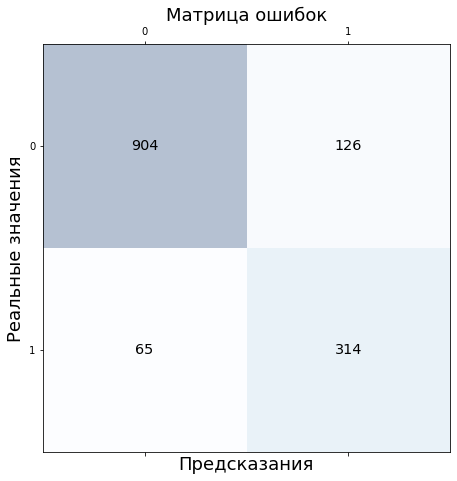

In [65]:
draw_confusion_matrix(confusion_matrix(target_test, predict_test))

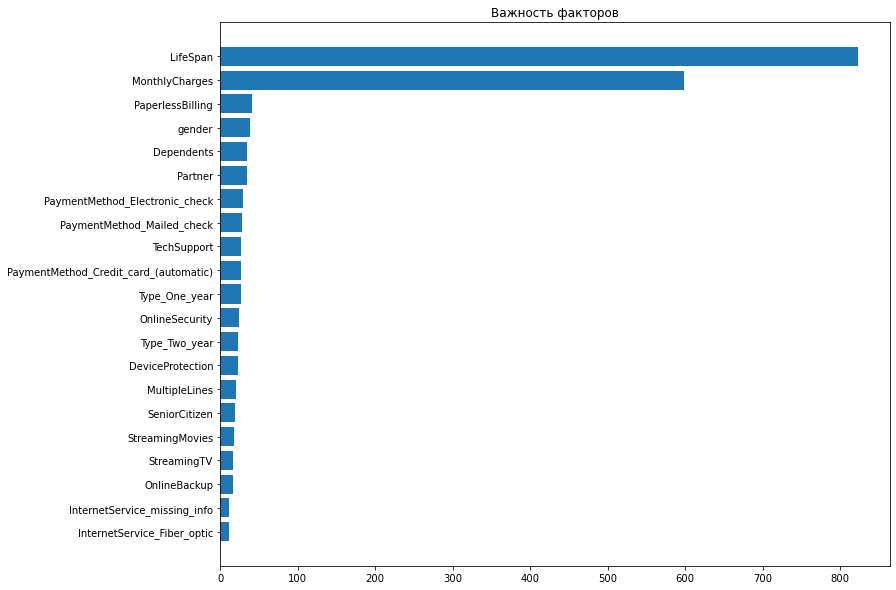

In [66]:
draw_features_imp(model.feature_importances_, features_train.columns)

#### 4.2. Catboost

In [67]:
model = CatBoostClassifier(random_seed=12345, n_estimators=280, max_depth=3, learning_rate=0.316228, logging_level='Silent')
model.fit(features_train, target_train)
predict_test = model.predict(features_test)

print(f'ROC-AUC на тесте: {roc_auc_score(target_test, predict_test)}')
print(f'Accuracy на тесте: {accuracy_score(target_test, predict_test)}')

ROC-AUC на тесте: 0.823105002945923
Accuracy на тесте: 0.886444286728176


#### 4.2.1. Представление результатов заказчику
Для более предметного разговора с заказчиком, так же предоставим данные матрицы ошибок, на основе которых можно посчитать возможные убытки и прибыль от работы нашей модели, и предоставим график важности факторов для обучения модели. 

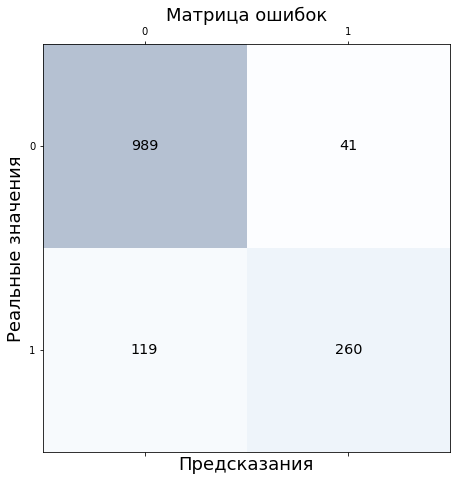

In [68]:
draw_confusion_matrix(confusion_matrix(target_test, predict_test))

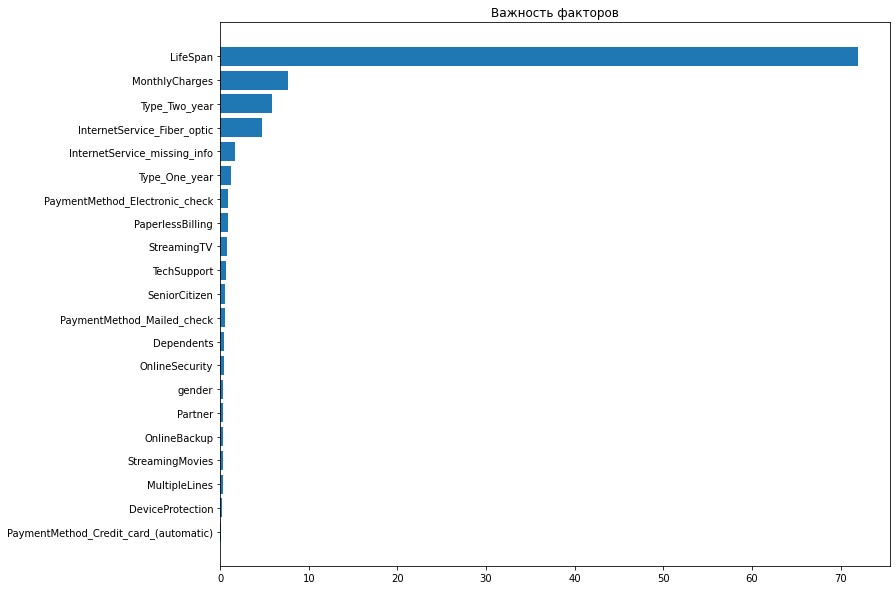

In [69]:
draw_features_imp(model.feature_importances_, features_train.columns)

#### 4.3. Dummy-модель

Для проверки адекватности результатов сравним результаты работы моделей с дамми-моделью. В нашем случае в качестве дамми-модели будем использовать проставление наиболее частого значения целевого признака.

In [70]:
target_test.value_counts()

0    1030
1     379
Name: leaving, dtype: int64

Наиболее частое значение целевого признака 0, поэтому будет проставлять нули

In [71]:
predict_dummy = [0]*target_test.shape[0]
print(f'ROC-AUC на тесте: {roc_auc_score(target_test, predict_dummy)}')
print(f'Accuracy на тесте: {accuracy_score(target_test, predict_dummy)}')

ROC-AUC на тесте: 0.5
Accuracy на тесте: 0.7310149041873669


### Вывод: протестировав модели на тестовом датасете, лучшие результаты показала модель Light GBM. Показав значение целевой метрики ROC-AUC равное 0.853. Сравнив работу нашей модели с результатом работы дамми-модели можем утверждать об адекватности полученных результатов.

<div class="alert alert-info">
<h1>Отчет по проекту:</h1>
В ходе выполнения проекта были выполнены следующие пункты<br>
    1. Подготовка данных.<br>
    1.1. Объединение имеющихся таблиц в единый датасет - <b>ВЫПОЛНЕНО</b><br>
    1.2. Обработать пропуски в данных - <b>ВЫПОЛНЕНО</b><br>
    1.3. Выделить фичи, которые будут использованы для работы модели, при необходимости создать новые (например: срок жизни клиента) - <b>ВЫПОЛНЕНО</b><br>
    1.4. разделить датасет на тренировочную/тестовую выборку - <b>ВЫПОЛНЕНО</b><br>
<b>Так же дополнительно была проведена проверка на мультиколлинеарность признаков, что помогло избавиться от одного из линейно зависимых признаков. </b>  <br>
    
2. Исследовать баланс классов, при необходимости выполнить обработку данных, чтоб снизить дизбаланс. - <b>ВЫПОЛНЕНО</b>
3. Обучить несколько моделей учитывая дисбаланс классов. Провести кросс-валидацию и найти лучшую. - <b>ВЫПОЛНЕНО</b>
4. Проверить качество работы модели на тестовых данных. Описать выводы - <b>ВЫПОЛНЕНО</b>

В качестве моделей использовались разные варианта градиентного бустинга - light GBM и Catboost. Наилучшее качество продемонстировала модель light GBM, достигнув значения целевой метрики ROC-AUC 0.853. 
Для более предметного разговора с заказчиком, так же предосталенны данные матрицы ошибок, на основе которых можно посчитать возможные убытки и прибыль от работы нашей модели, после того как заказчик определится с тем какие промокоды и скидки будут предоставляться пользователям. И график важности факторов, который можно будет учесть для дальнейшего сбора данных о пользователях и улучшения работы модели.
    
Наиболее трудозатратным этапом стала предобработка данных, что было ожидаемо на этапе планирования работы.
   
    
</div>